The following code block imports the required modules. It reads and displays the dataset. In order to obtain the primary category, an empty column is added to the dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

df = pd.read_csv('/Users/vikhyatkhosla/Downloads/flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv')
df.head()
df['primary_category'] = ' ' #Adding an empty column

Now, we are required to obtain the primary category from the product category tree and that is the function of this code block. The primary category is added to the empty column created in the previous code block and the dataframe is displayed.

In [2]:
i=0
while i!=20000:
    df['primary_category'][i] = (df['product_category_tree'][i].split(">>")[0])[2::] #Assigning primary value from product category tree
    i+=1
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,primary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies


The shape of the dataframe, which is the number of rows and columns is printed. 

In [3]:
df.shape

(20000, 16)

We have to process the descriptions column. Iterations are made row by row for all 20000 entries. At first, I have converted the description to a string, then to lower case, I then retained only the alphabets and all other characters are removed. Upon removal, there were double spaces and so I checked for the same and remove it to obtain single spaces. Then I returned this processed string to the description column. This is the function of the code block that follows.

In [4]:
i=0
while i!=20000:
    x = df['description'][i]
    x = str(x) 
    x = x.lower() 
    x = re.sub('[^a-z\s]+',' ',x) 
    x = re.sub('(\s+)',' ',x) 
    df['description'][i] = x
    i+=1
df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,primary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,key features of alisha solid women s cycling s...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,fabhomedecor fabric double sofa bed finish col...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,key features of aw bellies sandals wedges heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,key features of alisha solid women s cycling s...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,specifications of sicons all purpose arnica do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,buy walldesign small vinyl sticker for rs onli...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,buy wallmantra large vinyl stickers sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,buy elite collection medium acrylic sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http:

We are required to make predictions of the primary category using the description. The following code block retains only those two columns. The shape is displayed to validate the same.

In [5]:
df = df[['primary_category','description']]
df.shape

(20000, 2)

In order to visualize the data, we display a bar graph of the 50 most frequently occurring primary categories.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

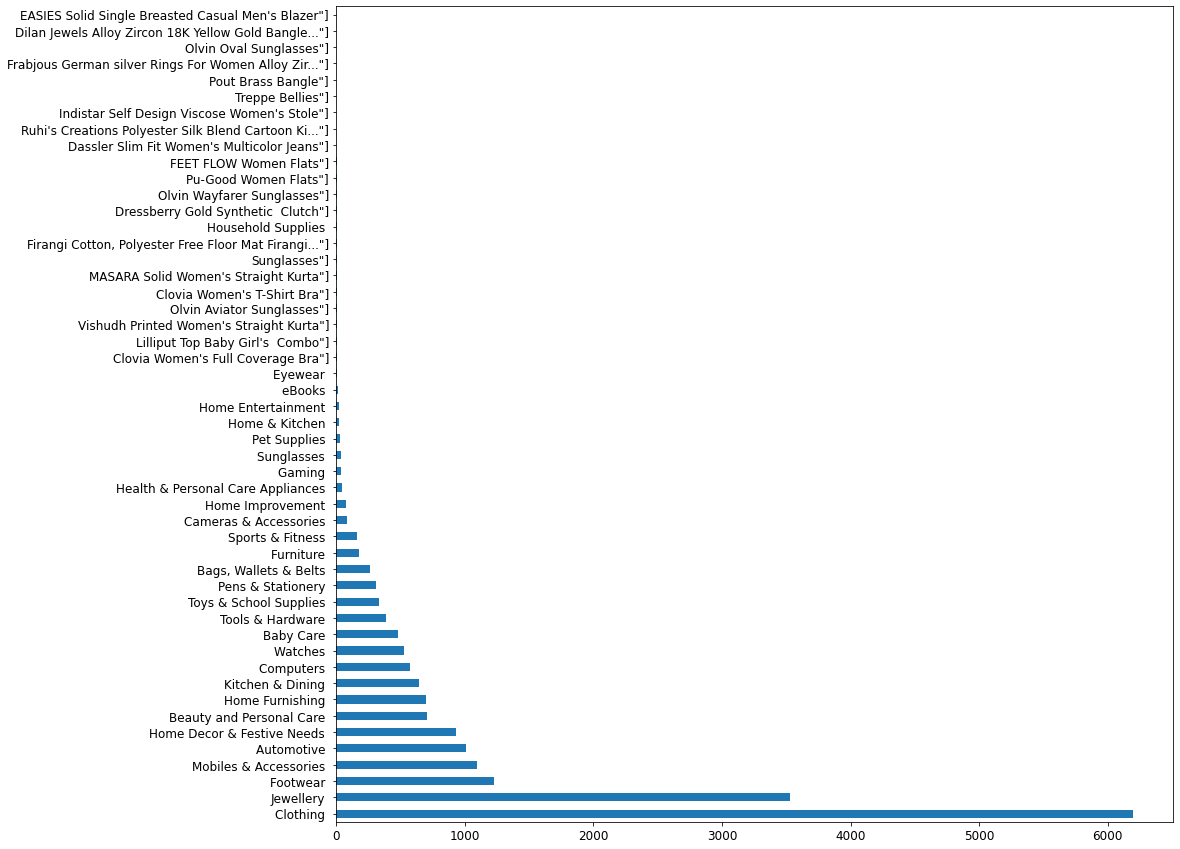

In [6]:
plt.figure(figsize = (15,15))
df['primary_category'].value_counts()[:50].plot(kind='barh') 
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

In order to validate my observation, the following code block prints the count of the number of times each primary category occurs. 

In [7]:
df['primary_category'].value_counts()

Clothing                                                 6198
Jewellery                                                3531
Footwear                                                 1227
Mobiles & Accessories                                    1099
Automotive                                               1012
                                                         ... 
Zixtro Bug (Black, Backpack)"]                              1
e-Fresh Boy's Brief (Pack of 5)"]                           1
Shrih Toe & Foot Protector Pain Relief Pad (Pack..."]       1
Kittens Boys Flats"]                                        1
e-Fresh Baby Boy's Brief (Pack of 10)"]                     1
Name: primary_category, Length: 266, dtype: int64

I observed that the dataset is severely imbalanced and so I only used the top 5 categories. The following code block iterates through 5 times and accesses the 5 most frequently occurred primary categories. The rest of the categories are left out in this analysis.

In [8]:
l = []
for i in range(5):
    l.append(df['primary_category'].value_counts().index.tolist()[i])
print(l)
df = df[df.primary_category.isin(l)] 
df

['Clothing ', 'Jewellery ', 'Footwear ', 'Mobiles & Accessories ', 'Automotive ']


,primary_category,description
0,Clothing,key features of alisha solid women s cycling s...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
6,Clothing,key features of alisha solid women s cycling s...
8,Footwear,key features of dilli bazaaar bellies corporat...
...,...,...
19936,Footwear,flipkart com buy purple women heels only for r...
19941,Footwear,flipkart com buy pinq chiq women heels only fo...
19953,Footwear,flipkart com buy la isla women heels only for ...
19958,Footwear,flipkart com buy we witches comfy hues women w...


The following code block assigns a category id to each primary category; Clothing is assigned 0 and so on. The shape is printed to validate the same.

In [9]:
df['category_id'] = df['primary_category'].factorize()[0]
df
df.shape

(13067, 3)

Data is split into training and testing data samples. 80% of the data is used for training and 20% of the data is used for testing. A sentence cannot be used directly for classification and so I am required to tokenize it. The sentence(here description) is converted to an integer matrix of tokens. This is done for the training and testing descriptions. The following code block performs the above-stated functions.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['description'],df['category_id'],test_size=0.2)
vect = CountVectorizer(stop_words = 'english') 
x_train_matrix = vect.fit_transform(x_train) 
x_test_matrix = vect.transform(x_test) 

The following code block uses the multinomial naive bayes classifier. The fitting of the training dataset is done. Scores are obtained on the training and testing datasets. The precision, recall, f1-score, and support score for the model are visualized.

In [11]:
model = MultinomialNB() 
model.fit(x_train_matrix, y_train) 
print(model.score(x_train_matrix, y_train)) 
print(model.score(x_test_matrix, y_test)) 
predicted_result = model.predict(x_test_matrix) 
print(classification_report(y_test,predicted_result))

0.9915813642016645
0.9927314460596787
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1256
           1       0.99      0.99      0.99       251
           2       1.00      0.99      0.99       214
           3       1.00      0.95      0.97       207
           4       0.98      1.00      0.99       686

    accuracy                           0.99      2614
   macro avg       0.99      0.98      0.99      2614
weighted avg       0.99      0.99      0.99      2614



The following code block uses the linear SVC classifier. The fitting of the training dataset is done. Scores are obtained on the training and testing datasets. The precision, recall, f1-score, and support score for the model are visualized.

In [12]:
model = LinearSVC()
model.fit(x_train_matrix, y_train)
print(model.score(x_train_matrix, y_train)) 
print(model.score(x_test_matrix, y_test))
predicted_result = model.predict(x_test_matrix) 
print(classification_report(y_test,predicted_result))

1.0
0.9984697781178271
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1256
           1       1.00      1.00      1.00       251
           2       0.99      1.00      0.99       214
           3       1.00      0.99      0.99       207
           4       1.00      1.00      1.00       686

    accuracy                           1.00      2614
   macro avg       1.00      1.00      1.00      2614
weighted avg       1.00      1.00      1.00      2614



/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
